# Import Required Libraries
Import the necessary libraries, including NumPy, pandas, sklearn, seaborn, matplotlib, and plotly.

In [29]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo

# Set Random Seed
Set the random seed for reproducibility using np.random.seed().

In [30]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate Dummy Data
Generate dummy data for the independent and dependent variables.

In [31]:
# Generate dummy data
n = 29  # Number of datapoints
x = np.linspace(2, 12, n)  # Independent variable
y = 2 * x + np.random.normal(0, 2, n)  # Dependent variable with Gaussian noise

# Create a DataFrame
Create a DataFrame using pandas and rename the columns.

In [32]:
# Create a DataFrame
data = pd.DataFrame({'Depth (m)': x, 'Pressure (MPa)': y})  # Rename columns here with correct units

# Display the first few rows of the DataFrame
data.head()

,Depth (m),Pressure (MPa)
0,2.000000,4.993428
1,2.357143,4.437757
2,2.714286,6.723949
3,3.071429,9.188917
4,3.428571,6.388836


# Plot the Data
Plot the data using matplotlib.

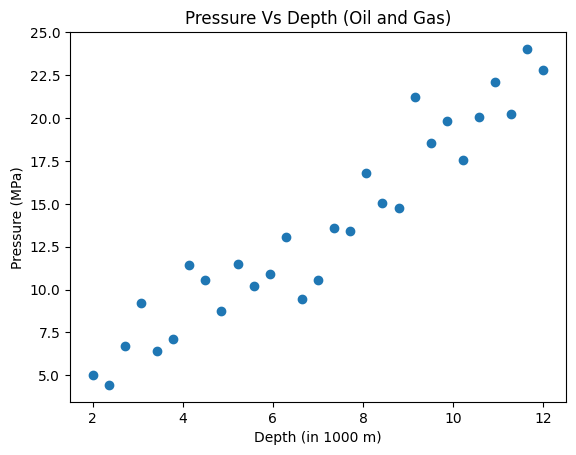

In [33]:
# Plot the data
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Pressure Vs Depth (Oil and Gas)')
plt.show()

# Create the Linear Regression Model
Create the linear regression model using sklearn.

In [34]:
# Create the linear regression model
model = LinearRegression()

# Fit the Model to the Data
Fit the model to the data using the fit() function.

In [35]:
# Fit the model to the data
model.fit(data[['Depth (m)']], data['Pressure (MPa)'])

LinearRegression()

# Predict the Values
Predict the values using the predict() function.

In [36]:
# Predict the values
y_pred = model.predict(data[['Depth (m)']])

# Display the predicted values
print(y_pred)

[ 4.69875374  5.33676043  5.97476712  6.6127738   7.25078049  7.88878718
  8.52679387  9.16480056  9.80280724 10.44081393 11.07882062 11.71682731
 12.35483399 12.99284068 13.63084737 14.26885406 14.90686075 15.54486743
 16.18287412 16.82088081 17.4588875  18.09689419 18.73490087 19.37290756
 20.01091425 20.64892094 21.28692763 21.92493431 22.562941  ]


# Plot the Data and the Line
Plot the data and the line using matplotlib.

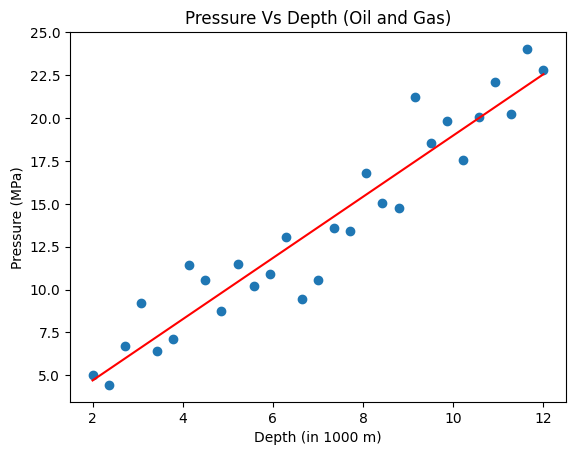

In [37]:
# Plot the data and the line
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.plot(data['Depth (m)'], y_pred, color='red')
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Pressure Vs Depth (Oil and Gas)')
plt.show()

# Plot the Data and the Line with Dashed Lines
Plot the data and the line with dashed lines using matplotlib.

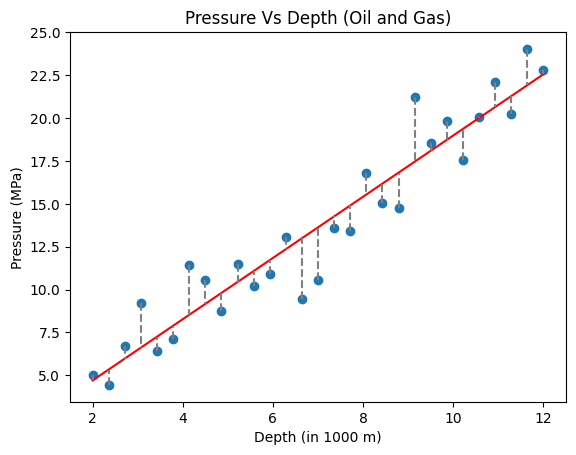

In [38]:
# Plot the data and the line with dashed lines
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.plot(data['Depth (m)'], y_pred, color='red')
for i in range(len(data)):
    plt.plot([data['Depth (m)'][i], data['Depth (m)'][i]], [data['Pressure (MPa)'][i], y_pred[i]], color='gray', linestyle='dashed')
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Pressure Vs Depth (Oil and Gas)')
plt.show()

In [39]:
print(f'Trained Regression Model:')
print(f'slope / Coefficient: {model.coef_[0]:.4f}')
print(f'Intercept/Bias: {model.intercept_:.4f}')

Trained Regression Model:
slope / Coefficient: 1.7864
Intercept/Bias: 1.1259


# Calculate Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE)
Calculate the MSE, RMSE, and MAE using sklearn.

In [40]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(data['Pressure (MPa)'], y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(data['Pressure (MPa)'], y_pred)

# Print the calculated errors
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 2.8312221010686196
Root Mean Squared Error (RMSE): 1.6826235767600013
Mean Absolute Error (MAE): 1.3829390342391048


# Make Prediction for Depth = 7
Make a prediction for a depth of 7 using the predict() function.

In [41]:
# Make prediction for depth = 7
depth = 7
depth_df = pd.DataFrame([depth], columns=['Depth (m)'])  # Use 'Depth (m)' as the column name
pressure_pred = model.predict(depth_df)

# Print the predicted pressure
print("Predicted Pressure (MPa) for Depth of 7 (in 1000 m):", pressure_pred[0])

Predicted Pressure (MPa) for Depth of 7 (in 1000 m): 13.630847370638769


c:\Users\Gurdeep\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



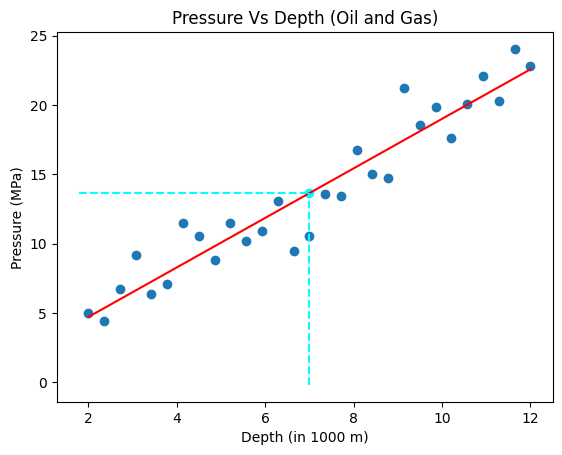

In [42]:

# Plot the data and the line with dashed lines
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.plot(data['Depth (m)'], y_pred, color='red')
plt.scatter(depth, pressure_pred, color='cyan')
plt.plot([depth, depth], [-0.2, pressure_pred], color='cyan', linestyle='dashed')
plt.plot([1.8, depth], [pressure_pred, pressure_pred], color='cyan', linestyle='dashed')
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Pressure Vs Depth (Oil and Gas)')
plt.show()

# Add Temperature to the Data
Add a temperature column to the data.

In [43]:
# Add a temperature column to the data
data2 = data.copy()
data2['Temperature (C)'] = 1.5 * data['Depth (m)'] + np.random.normal(0, 2.5, n)
data2 = data2[['Depth (m)', 'Temperature (C)', 'Pressure (MPa)']]

# Display the first few rows of the DataFrame
data2.head()

,Depth (m),Temperature (C),Pressure (MPa)
0,2.000000,2.270766,4.993428
1,2.357143,2.031448,4.437757
2,2.714286,8.702124,6.723949
3,3.071429,4.573400,9.188917
4,3.428571,2.498580,6.388836


# Pair Plot
Create a pair plot using seaborn.

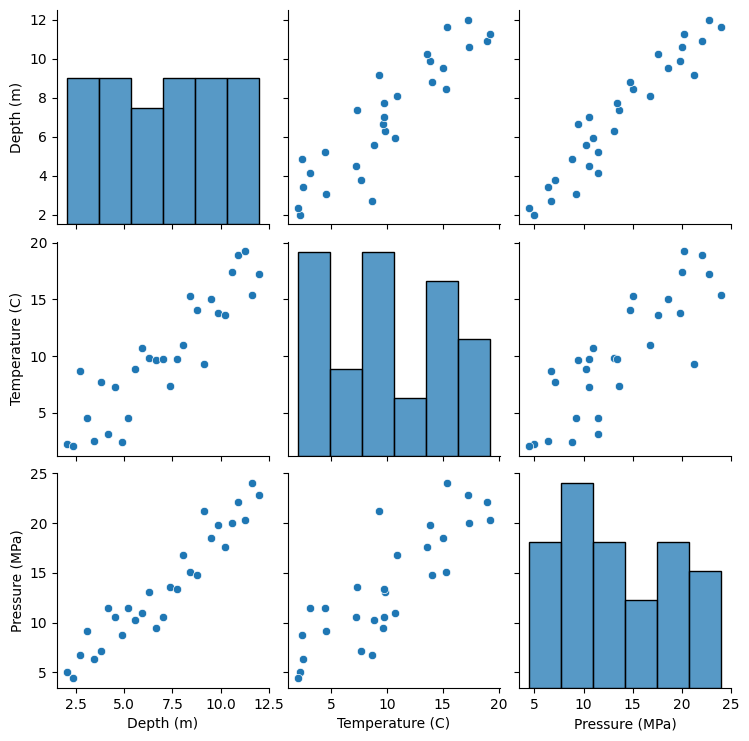

In [44]:
# Create a pair plot of the data
sns.pairplot(data2)

# Display the plot
plt.show()

# Create 3D Scatter Plot
Create a 3D scatter plot using plotly.

In [45]:
# Create a 3D scatter plot using plotly
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(data2, x='Depth (m)', y='Temperature (C)', z='Pressure (MPa)')

# Update the size of the markers
fig.update_traces(marker=dict(size=3))

# Display the plot
fig.show()

# Save the plot as an interactive HTML file
pyo.plot(fig, filename='3d_scatter_plot.html')

'3d_scatter_plot.html'

# Create the Linear Regression Model for Data2
Create the linear regression model for the new data using sklearn.

In [46]:
# Create the linear regression model for data2
model2 = LinearRegression()

# Fit the model to the data
model2.fit(data2[['Depth (m)', 'Temperature (C)']], data2['Pressure (MPa)'])

# Predict the values
y_pred2 = model2.predict(data2[['Depth (m)', 'Temperature (C)']])

# Calculate Mean Squared Error (MSE) for data2
mse2 = mean_squared_error(data2['Pressure (MPa)'], y_pred2)

# Calculate Root Mean Squared Error (RMSE) for data2
rmse2 = np.sqrt(mse2)

# Calculate Mean Absolute Error (MAE) for data2
mae2 = mean_absolute_error(data2['Pressure (MPa)'], y_pred2)

# Print the calculated errors for data2
print("Mean Squared Error (MSE) for data2:", mse2)
print("Root Mean Squared Error (RMSE) for data2:", rmse2)
print("Mean Absolute Error (MAE) for data2:", mae2)

Mean Squared Error (MSE) for data2: 2.753331094137005
Root Mean Squared Error (RMSE) for data2: 1.6593164538860588
Mean Absolute Error (MAE) for data2: 1.387314360231067


In [47]:
# Create a 3D scatter plot of the predicted values
fig = px.scatter_3d(data2, x='Depth (m)', y='Temperature (C)', z=y_pred2)

# Update the size of the markers
fig.update_traces(marker=dict(size=3))

# Display the plot
fig.show()

# Save the plot as an interactive HTML file
pyo.plot(fig, filename='3d_regression_plot.html')


'3d_regression_plot.html'

In [48]:

# Make prediction for depth = 7 and temperature = 10
depth = 7
temperature = 10
data_pred = pd.DataFrame({'Depth (m)': [depth], 'Temperature (C)': [temperature]})
pressure_pred2 = model2.predict(data_pred)

# Print the predicted pressure for depth = 7 and temperature = 10
print("Predicted Pressure (MPa) for Depth of 7 (in 1000 m) and Temperature of 10 (in C):", pressure_pred2[0])

Predicted Pressure (MPa) for Depth of 7 (in 1000 m) and Temperature of 10 (in C): 13.6368967760482
